In [1]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
from utils import show_images, show

## array.item()和array.itemset()

In [6]:
img = cv2.imread('jp.png')
print(img.item(10,10,2))
img.itemset((10,10,2),100)
print(img.item(10,10,2))
print('img.dtype', img.dtype)
print('img.size (像素數目)', img.size)
print('img.shape', img.shape)
322*600*3

39
100
img.dtype uint8
img.size (像素數目) 579600
img.shape (322, 600, 3)


579600

# ROI （感兴趣区域)
ROI（region of interest），感兴趣区域。机器视觉、图像处理中，从被处理的图像以方框、圆、椭圆、不规则多边形等方式勾勒出需要处理的区域，称为感兴趣区域，ROI。在Halcon、OpenCV、Matlab等机器视觉软件上常用到各种算子（Operator）和函数来求得感兴趣区域ROI，并进行图像的下一步处理。

# Translation

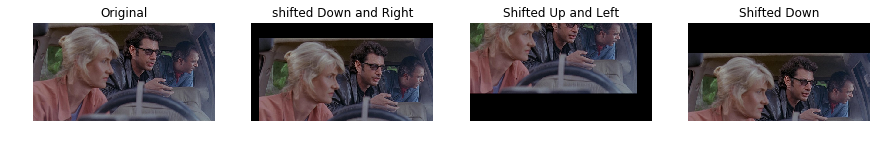

In [8]:
image_dir = "images/jp.png"
image = cv2.imread(image_dir)
# cv2.imshow("Original", image)

M = np.float32([[1, 0, 25], [0, 1, 50]])
shifted1 = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
# cv2.imshow("shifted Down and Right", shifted)

M = np.float32([[1, 0, -50], [0, 1, -90]])
shifted2 = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
# cv2.imshow("Shifted Up and Left", shifted)
# cv2.waitKey(0)

shifted3 = imutils.translate(image, 0, 100)
# cv2.imshow("Shifted Down", shifted)
# cv2.waitKey(0)

show_images(
    [image, shifted1, shifted2, shifted3], 
    ['Original', "shifted Down and Right", "Shifted Up and Left", "Shifted Down"],
    ver=False)

# Rotate
## getRotationMatrix2D(center, angle, scale) -> retval

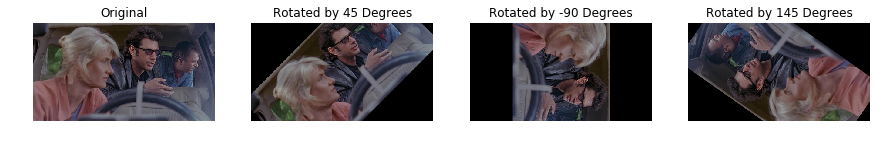

In [13]:
image_dir = "images/jp.png"
image = cv2.imread(image_dir)
# cv2.imshow("Original", image)

(h, w) = image.shape[:2]
center = (w // 2, h // 2)

M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated1 = cv2.warpAffine(image, M, (w, h))
# cv2.imshow("Rotated by 45 Degrees", rotated)

M = cv2.getRotationMatrix2D(center, -90, 1.0)
rotated2 = cv2.warpAffine(image, M, (w, h))
# cv2.imshow("Rotated by -90 Degrees", rotated)

# cv2.waitKey(0)

rotated3 = imutils.rotate(image, 145)
# cv2.imshow("Rotated by 180 Degrees", rotated)
# cv2.waitKey(0)
show_images(
    [image, rotated1, rotated2, rotated3],
    ['Original', 'Rotated by 45 Degrees', "Rotated by -90 Degrees", "Rotated by 145 Degrees"],
    ver=False)

# Resize

## 內插方式有以下幾種可選：
 - CV_INTER_NEAREST ：最鄰近插點法。
 - CV_INTER_LINEAR ：雙線性插補(預設)。
 - CV_INTER_AREA ：臨域像素再取樣插補。
 - CV_INTER_CUBIC ：雙立方插補，4×4大小的補點。
 - CV_INTER_LANCZOS4 ：Lanczos插補，8×8大小的補點。
 
### 當我們縮小影像時，使用CV_INTER_AREA會有比較好的效果，當我們放大影像，CV_INTER_CUBIC會有最好的效果，但是計算花費時間較多，CV_INTER_LINEAR能在影像品質和花費時間上取得不錯的平衡。

In [15]:
image_dir = "images/jp.png"
image = cv2.imread(image_dir)
cv2.imshow("Original", image)

r = 150.0 / image.shape[1]
dim = (150, int(image.shape[0] * r))

resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
cv2.imshow("Resized (Width INTER_AREA)", resized)

resized = cv2.resize(image, dim, interpolation = cv2.INTER_LINEAR)
cv2.imshow("Resized (Width INTER_LINEAR)", resized)

resized = cv2.resize(image, dim, interpolation = cv2.INTER_CUBIC)
cv2.imshow("Resized (Width INTER_CUBIC)", resized)

resized = cv2.resize(image, dim, interpolation = cv2.INTER_NEAREST)
cv2.imshow("Resized (Width INTER_NEAREST)", resized)
cv2.waitKey(0)

r = 50.0 / image.shape[0]
dim = (int(image.shape[1] * r), 50)

resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
cv2.imshow("Resized (Height)", resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

113

# Flipping

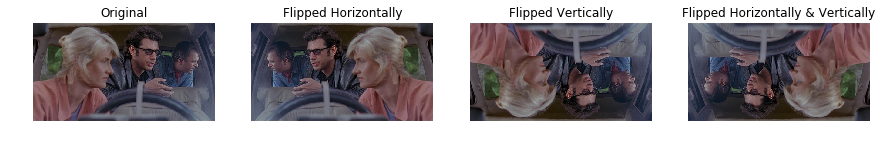

In [3]:
image_dir = "images/jp.png"
image = cv2.imread(image_dir)
# cv2.imshow("Original", image)

flipped1 = cv2.flip(image, 1)
# cv2.imshow("Flipped Horizontally", flipped)

flipped2 = cv2.flip(image, 0)
# cv2.imshow("Flipped Vertically", flipped)

flipped3 = cv2.flip(image, -1)
# cv2.imshow("Flipped Horizontally & Vertically", flipped)
# cv2.waitKey(0)

show_images(
    [image, flipped1, flipped2, flipped3],
    ["Original", "Flipped Horizontally", "Flipped Vertically", "Flipped Horizontally & Vertically"], ver=False)

# 拆封及合併圖像通道

In [14]:
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

(322, 600, 1)
(322, 600, 1)
(322, 600, 1)
(322, 600)
(322, 600, 3)


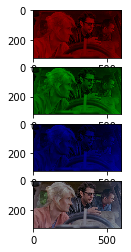

In [50]:
img = cv2.imread('images/jp.png')
b, g, r = cv2.split(img)

rr, gg, bb = np.expand_dims(r, axis=2), np.expand_dims(g, axis=2), np.expand_dims(b, axis=2)
zz = np.zeros_like(rr) # (x,x,1)
z = np.zeros_like(r) # (x,x)
for c in (rr, gg, bb, z):
    print(c.shape)

plt.subplot(411)
# tmp1 = np.concatenate((rr, zz ,zz), axis=2)
tmp1 = cv2.merge([r, z, z])
print(tmp1.shape)
plt.imshow(tmp1)

plt.subplot(412)
# tmp2 = np.concatenate((zz,gg ,zz), axis=2)
tmp2 = cv2.merge([z,g,z])
plt.imshow(tmp2)

plt.subplot(413)
# tmp3 = np.concatenate((zz,zz,bb), axis=2)
tmp3 = cv2.merge([z,z,b])
plt.imshow(tmp3)

plt.subplot(414)
plt.imshow(cv2.merge([r,g,b]))

# color spaces
### [Reference](http://monkeycoding.com/?p=690#BGR_YCrCb)

<img src="images/hsv.png" style="width:550px">

# 為圖像擴邊(填充)
# Making Borders for Images (Padding)
## cv2.copyMakeBorder()

 - src - input image

 - top, bottom, left, right - border width in number of pixels in corresponding directions

 - borderType - Flag defining what kind of border to be added. It can be following types:
     - cv2.BORDER_CONSTANT - Adds a constant colored border. The value should be given as next argument.
     - cv2.BORDER_REFLECT - Border will be mirror reflection of the border elements, like this : fedcba|abcdefgh|hgfedcb
     - cv2.BORDER_REFLECT_101 or cv2.BORDER_DEFAULT - Same as above, but with a slight change, like this : gfedcb|abcdefgh|gfedcba
     - cv2.BORDER_REPLICATE - Last element is replicated throughout, like this: aaaaaa|abcdefgh|hhhhhhh
     - cv2.BORDER_WRAP - Can’t explain, it will look like this : cdefgh|abcdefgh|abcdefg
 - value - Color of border if border type is cv2.BORDER_CONSTANT
 
<img src="images/border.jpg" style="width:450">

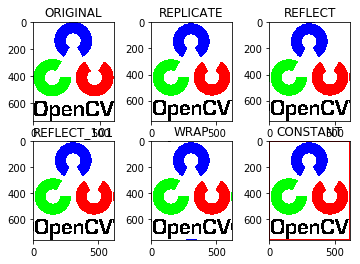

In [6]:
import cv2
import numpy
from matplotlib import pyplot as plt
# img = cv2.imread('jp.jpg')
img1 = cv2.imread('OpenCV_Logo.png')
BLUE = [255,0,0]
replicate = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)

plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show()

# 圖像運算
## Arithmetic Operations on Images
## cv2.add()  和 numpy 加法的不同

In [ ]:
x=np.uint8([250])
y=np.uint8([10])
print(cv2.add(x,y))#250+10=260>=255
#结果为[[255]]
print (x+y)#250+10=260%255=4
#结果为[4]

# 圖像混合(Image Blending)
<img src="images/blend.png">

In [34]:
img1.shape[1::-1]

(600, 322)

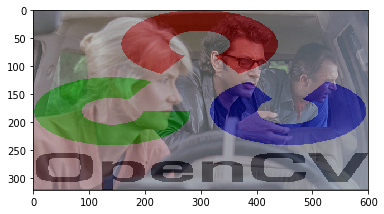

In [40]:
img1 = cv2.imread('images/jp.png')
img2 = cv2.imread('images/OpenCV_Logo.png')
img2 = cv2.resize(img2, img1.shape[1::-1])
dst = cv2.addWeighted(img1,0.7, img2, 0.3, 0)
show(dst)

# Bitwise Operations
这里包括按位操作有：AND，OR，NOT，XOR等，当我们提取图像的一部分，选择非矩形ROI时，会很有用。下面进行如何改变一幅图的特定区域。

I want to put OpenCV logo above an image. If I add two images, it will change color. If I blend it, I get an transparent effect. But I want it to be opaque. If it was a rectangular region, I could use ROI as we did in last chapter. But OpenCV logo is a not a rectangular shape. So you can do it with bitwise operations as below:

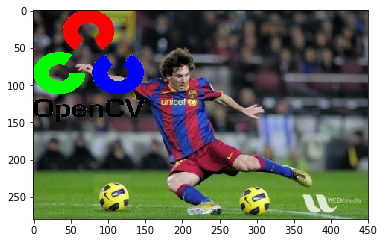

In [4]:
# Load two images
img1 = cv2.imread('m.jpg')
img2 = cv2.resize(cv2.imread('OpenCV_Logo.png'), (150, 150))

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
show(img2gray)
ret, mask = cv2.threshold(img2gray, 150, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask)

# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask_inv)

# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

show(img1)

# cv2.imshow('img2gray', img2gray)
# cv2.imshow('mask', mask)
cv2.imshow('mask_inv', mask_inv)
cv2.imshow('img1_bg', img1_bg)
# cv2.imshow('img2_fg', img2_fg)
# cv2.imshow('img2', img2)
cv2.imshow('img1', img1)

cv2.waitKey(0)
cv2.destroyAllWindows()